In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# April 2024
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

Data Loading and Exploration

In [3]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

In [4]:
print(X.shape)

(70000, 784)


In [5]:
np.unique(y, return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958],
       dtype=int64))

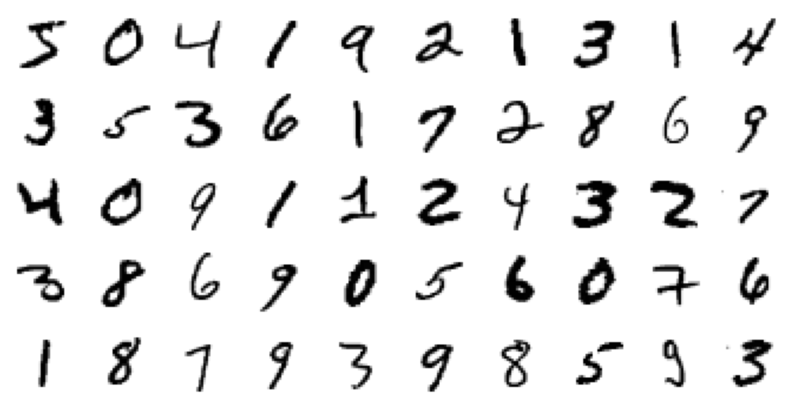

In [6]:
fig, axes = plt.subplots(5, 10, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='binary')
    ax.axis('off')   
    
plt.savefig('figures/mnist_digits.pdf', bbox_inches='tight')

In [7]:
X = X / 255.0  # Scale features to [0, 1]

In [8]:
train_size = 60000
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

Training the Model

In [9]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

C:\Users\roi_y\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [10]:
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [11]:
print(clf.n_iter_)

[265]


Model Evaluation

In [12]:
print(f'Train accuracy: {clf.score(X_train, y_train):.4f}')
print(f'Test accuracy: {clf.score(X_test, y_test):.4f}')

Train accuracy: 0.9388
Test accuracy: 0.9259


In [13]:
from sklearn.metrics import classification_report

y_test_pred = clf.predict(X_test)
report = classification_report(y_test, y_test_pred, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.9532    0.9765    0.9647       980
           1     0.9619    0.9789    0.9703      1135
           2     0.9291    0.9012    0.9149      1032
           3     0.9038    0.9119    0.9078      1010
           4     0.9360    0.9389    0.9375       982
           5     0.8954    0.8733    0.8842       892
           6     0.9421    0.9509    0.9465       958
           7     0.9331    0.9232    0.9281      1028
           8     0.8850    0.8768    0.8809       974
           9     0.9095    0.9167    0.9131      1009

    accuracy                         0.9259     10000
   macro avg     0.9249    0.9248    0.9248     10000
weighted avg     0.9257    0.9259    0.9257     10000



In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

micro_precision = precision_score(y_test, y_test_pred, average='micro')
micro_recall = recall_score(y_test, y_test_pred, average='micro')
micro_f1 = f1_score(y_test, y_test_pred, average='micro')

print(f'Micro Precision: {micro_precision:.4f}')
print(f'Micro Recall: {micro_recall:.4f}')
print(f'Micro F1 Score: {micro_f1:.4f}')

Micro Precision: 0.9259
Micro Recall: 0.9259
Micro F1 Score: 0.9259


Error Analysis

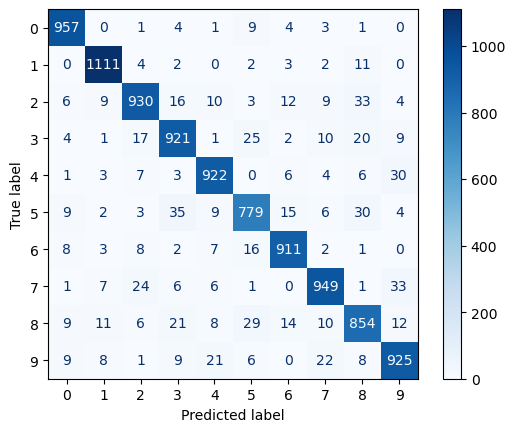

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

plt.savefig('figures/mnist_confusion_matrix.pdf', bbox_inches='tight')

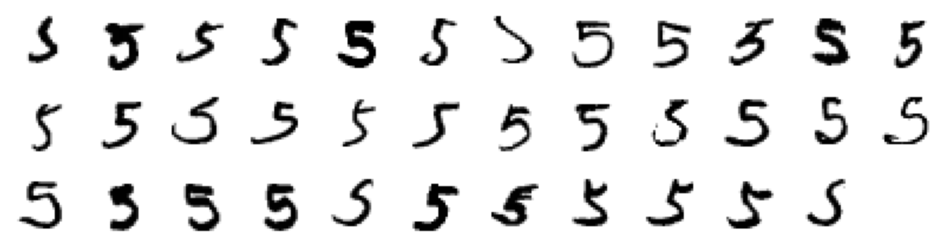

In [16]:
X_5conf3 = X_test[(y_test == '5') & (y_test_pred == '3')]

# Display these misclassified images in a grid
num_images = len(X_5conf3)
rows = 3
cols = (num_images + rows - 1) // rows  

fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
axes = axes.flatten()
for i in range(num_images):
    axes[i].imshow(X_5conf3[i].reshape(28, 28), cmap='binary')
    axes[i].axis('off')

# Hide any unused subplots
for i in range(num_images, len(axes)):
    axes[i].axis('off')

plt.savefig('figures/mnist_5_confused_with_3.pdf', bbox_inches='tight')

Visualizing the Weights

In [17]:
print(clf.coef_.shape)

(10, 784)


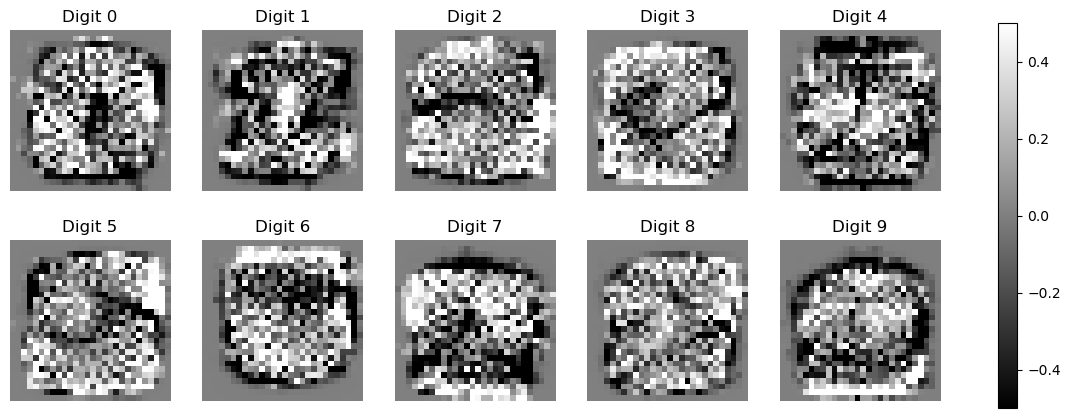

In [18]:
fig, axes = plt.subplots(2, 5, figsize=(15, 5))

for i, ax in enumerate(axes.flat):
    # Reshape the i-th row of the weight matrix and plot it
    img = ax.imshow(clf.coef_[i].reshape(28, 28), cmap='gray', vmin=-0.5, vmax=0.5)
    ax.axis('off')
    ax.set_title(f'Digit {i}')
    
# Add a colorbar to show the weight scale
fig.colorbar(img, ax=axes.flat)
plt.savefig('figures/mnist_model_weights.pdf', bbox_inches='tight')